https://www.geeksforgeeks.org/multi-layer-perceptron-learning-in-tensorflow/

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation

2024-08-18 18:56:11.575196: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-18 18:56:11.578095: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-18 18:56:11.587748: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-18 18:56:11.602766: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-18 18:56:11.607230: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-18 18:56:11.619080: I tensorflow/core/platform/cpu_feature_gu

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# vastly increases accuracy
gray_scale = 255
x_train /= gray_scale
x_test /= gray_scale

In [4]:
print("Feature matrix:", x_train.shape) 
print("Target matrix:", x_test.shape) 
print("Feature matrix:", y_train.shape) 
print("Target matrix:", y_test.shape) 

Feature matrix: (60000, 28, 28)
Target matrix: (10000, 28, 28)
Feature matrix: (60000,)
Target matrix: (10000,)


<Figure size 2800x2800 with 0 Axes>

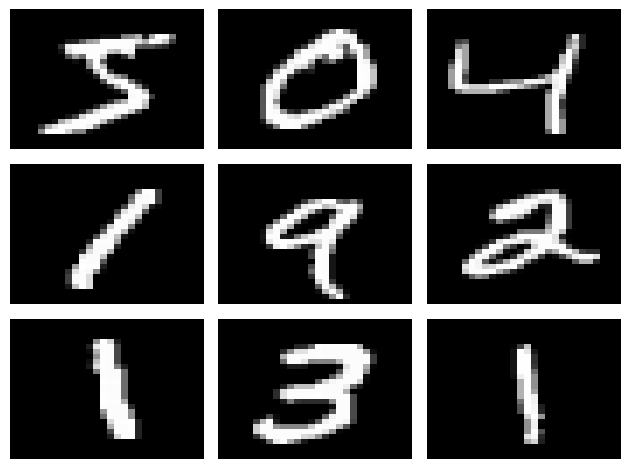

In [5]:
plt.figure(figsize=(28, 28))

fig, ax = plt.subplots(3, 3)
k = 0
for i in range(3): 
    for j in range(3): 
        ax[i][j].axis("off"), ax[i][j].imshow(x_train[k].reshape(28, 28),  
                        aspect='auto', cmap="gray") 
        k += 1
        
plt.tight_layout()

In [6]:
model = Sequential([ 
    # reshape 28 row * 28 column data to 28*28 rows 
    Flatten(input_shape=(28, 28)), 
    
    # dense layer 1 
    Dense(256, activation='relu'),   
    
    # dense layer 2 
    Dense(128, activation='relu'),  
    
    # output layer 
    Dense(10, activation='softmax'),   
])

/home/jass/repos/college9/20XW96 - DEEP LEARNING LAB/venv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
I0000 00:00:1723987573.458978  417786 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-08-18 18:56:13.484530: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2343] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.


In [7]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy']) 

In [8]:
model.fit(x_train, y_train, epochs=10,  
          batch_size=2000,  
          validation_split=0.2) 

Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.5482 - loss: 1.6163 - val_accuracy: 0.8921 - val_loss: 0.3730
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8972 - loss: 0.3528 - val_accuracy: 0.9253 - val_loss: 0.2607
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9279 - loss: 0.2524 - val_accuracy: 0.9418 - val_loss: 0.2085
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9425 - loss: 0.2047 - val_accuracy: 0.9512 - val_loss: 0.1763
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9521 - loss: 0.1681 - val_accuracy: 0.9559 - val_loss: 0.1573
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9613 - loss: 0.1405 - val_accuracy: 0.9598 - val_loss: 0.1429
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9652 - loss: 0.1247 - val_accuracy: 0.9630 - val_loss: 0.1310
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9698 - loss: 0.1104 - val_accuracy: 0.9630 - val_l

In [9]:
results = model.evaluate(x_test,  y_test, verbose = 0) 
print('test loss, test acc:', results)

test loss, test acc: [0.10882451385259628, 0.9674999713897705]


In [10]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=np.array([np.argmax(i) for i in model.predict(x_test)]))
cm

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 578us/step


<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 971,    0,    1,    1,    1,    3,    0,    2,    1,    0],
       [   0, 1118,    4,    0,    0,    1,    4,    1,    7,    0],
       [   5,    0,  996,    3,    2,    1,    3,    6,   16,    0],
       [   1,    0,    5,  970,    0,    9,    0,    9,   16,    0],
       [   1,    0,    8,    0,  950,    0,    0,    2,    3,   18],
       [   2,    1,    0,   10,    2,  859,    8,    0,    7,    3],
       [   7,    3,    2,    1,   10,   12,  917,    0,    6,    0],
       [   1,    6,   10,    5,    0,    1,    0,  995,    2,    8],
       [   4,    0,    4,    5,    2,    3,    2,    2,  951,    1],
       [   7,    6,    1,   10,   16,    4,    1,    7,    9,  948]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Actual')

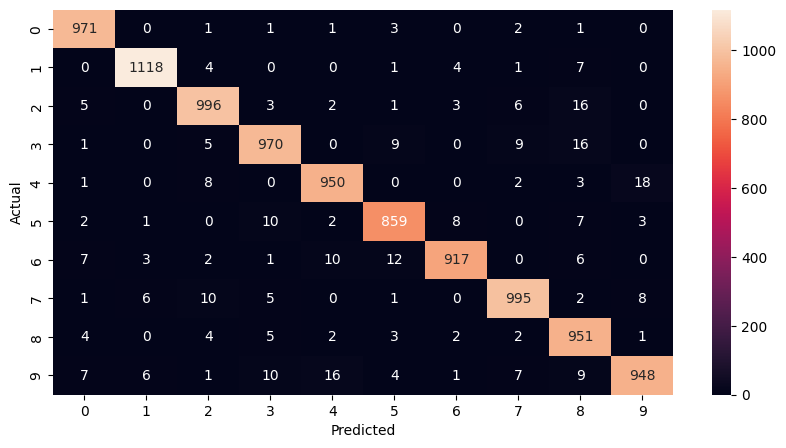

In [11]:
plt.figure(figsize=(10, 5))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")